<a href="https://colab.research.google.com/github/HassanNetSec/phishguard-ai/blob/main/PhishGuard_ML_Training_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup Environment**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from time import perf_counter
import shap
from sklearn.model_selection import learning_curve
import joblib
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# **Load Dataset**

In [ ]:
df=pd.read_excel('phishing_websites.xlsx')
df = df.drop('Unnamed: 0', axis=1)


### **Plot Target Distribution**

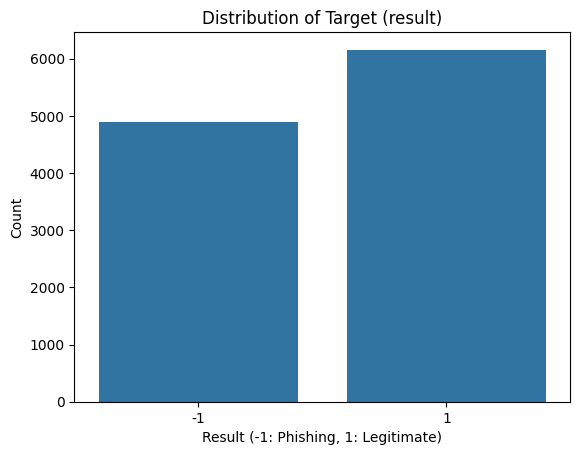

In [ ]:
# Count of phishing vs legitimate URLs
sns.countplot(x='result', data=df)
plt.title('Distribution of Target (result)')
plt.xlabel('Result (-1: Phishing, 1: Legitimate)')
plt.ylabel('Count')
plt.show()


### **Histogram of Features**

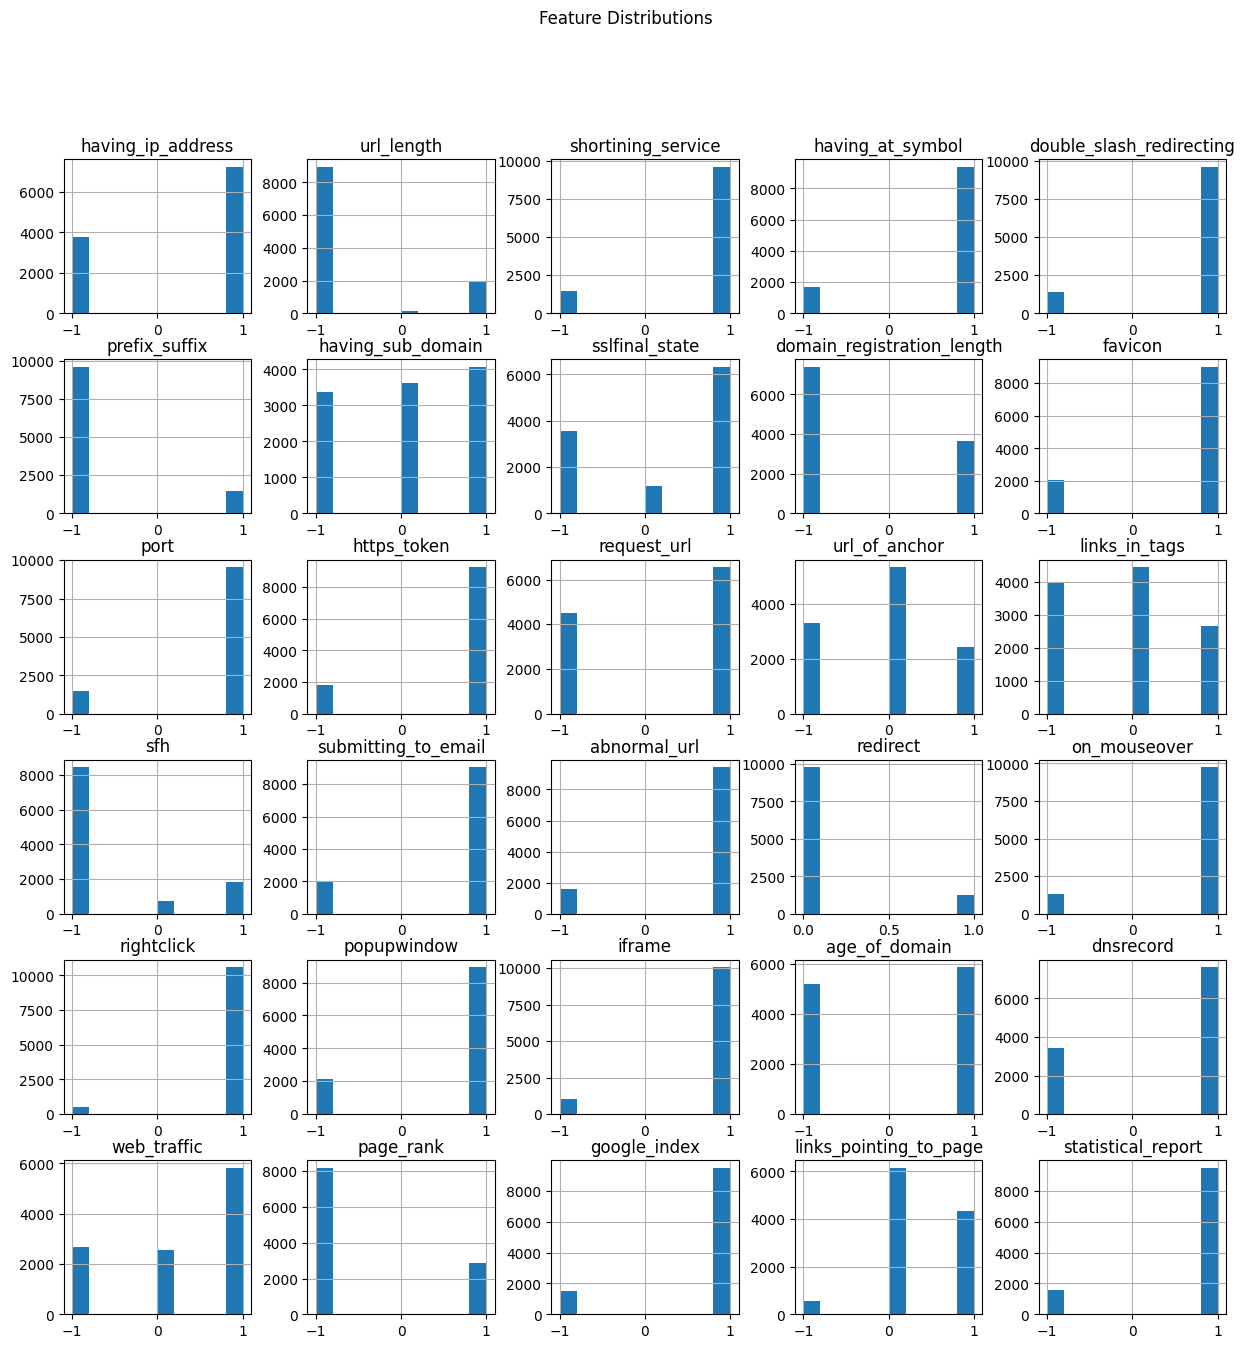

In [ ]:
# Select input features only
features = df.drop('result', axis=1)

# Plot histograms
features.hist(figsize=(15,15))
plt.suptitle('Feature Distributions')
plt.show()

# **Explore Dataset**

In [ ]:
import pandas as pd  # Ensure pandas is imported if not already

# Assuming 'df' is your DataFrame; load it here if needed (e.g., df = pd.read_csv('your_file.csv'))

# Calculate missing values and percentages
total_nulls = df.isnull().sum()

# Print missing values summary
print("Missing values summary (count and percentage per column):\n")
print(total_nulls.round(2))  # Round percentages for readability

# Print dataset info (data types, non-null counts, memory usage)
print("\nSummary of the dataset:")
df.info()

# Print descriptive statistics (for numerical columns by default; use include='all' for categorical too)
print("\nDescription of the dataset:")
print(df.describe().round(2))  # Round for readability; adjust as needed

Missing values summary (count and percentage per column):

having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_r

# **Data Preparation for Model Training**

## **Split Dataset into Features and Target**

In [ ]:
X = df.drop('result', axis=1)
y = df['result']


## **Train–Test Split**

In [ ]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# **Model Training**

## **Decision Tree**

**Description**: A tree-based model that splits data based on feature values to make predictions.
**Why it’s good**:
1.  ***Easy to understand***: You can see exactly how the model makes its decisions because it’s like a flowchart.
2.   ***Flexible***: Works with both numbers and categories..
3.   handles multiple classes automatically you just need to provide class label





In [ ]:


dt_model = DecisionTreeClassifier(
    max_depth=7, #You don’t want the tree to memorize every entry (overfit), but you also want it to capture patterns.
    min_samples_split=15, #min_samples_split=10 to 20 prevents the tree from splitting on unimportant patterns.
    criterion='entropy',
    random_state=42 #Always set a number like 42 to make your results reproducible.
)
start_time = perf_counter()
dt_model.fit(X_train, Y_train)
end_time = perf_counter()
traning_time = end_time - start_time

y_pred = dt_model.predict(x_test)
# accuracy this show the percentage of how much your model is accurace
accuracy = accuracy_score(y_test, y_pred)

# F1-score: A single score that combines precision and recall to show overall performance
f1score = f1_score(y_test, y_pred, average='weighted') # weight because it is multi class variable(-1,0,1)

# Precision: Out of all times the model said a class (like -1), how many were actually correct
precisionscore = precision_score(y_test, y_pred, average='weighted')

# Recall: Out of all real samples of a class, how many the model correctly found(like -1 5sample how many -1 class sample model find)
recallscore = recall_score(y_test, y_pred, average='weighted')
# confusion matricx
cm = confusion_matrix(y_test, y_pred)
TrueNegative = cm[0][0]
FalsePositive = cm[0][1]
FalseNegative = cm[1][0]
TruePositive = cm[1][1]
modelsMatrics_df = pd.DataFrame({
    'Model' : 'Decision Tree',
    'Accuracy': [accuracy],
    'F1-Score': [f1score],
    'Precision': [precisionscore],
    'Recall': [recallscore],
    'ConfusionMatrix(TN,FP,FN,TP)' : [(TrueNegative,FalsePositive,FalseNegative,TruePositive)],
    'TraningTime' : [round(traning_time,2)],
})

modelsMatrics_df = modelsMatrics_df.round(2)


## Logistic Regression

**Description**: A linear model used for classification that predicts the probability of each class using a logistic (sigmoid) function. It is widely used for binary and multi-class problems.

**Why it’s good:**


1.   **Simple and fast:** Easy to train and interpret.
2.  **Good baseline model:** Often used as a first model to compare with more complex models.



In [ ]:
model = LogisticRegression()


start_time = perf_counter()
model.fit(X_train, Y_train)
end_time = perf_counter()
traning_time = end_time - start_time
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
precisionscore = precision_score(y_test, y_pred)
recallscore = recall_score(y_test, y_pred)
# confusion matricx
cm = confusion_matrix(y_test, y_pred)
TrueNegative = cm[0][0]
FalsePositive = cm[0][1]
FalseNegative = cm[1][0]
TruePositive = cm[1][1]

logisticRegression_df = pd.DataFrame({
    'Model' : 'Logistic Regression',
    'Accuracy': [accuracy],
    'F1-Score': [f1score],
    'Precision': [precisionscore],
    'Recall': [recallscore],
    'ConfusionMatrix(TN,FP,FN,TP)' : [(TrueNegative,FalsePositive,FalseNegative,TruePositive)],
    'TraningTime' : [f'{traning_time:.2f}']
})

logisticRegression_df = logisticRegression_df.round(2)
modelsMatrics_df = pd.concat([
    modelsMatrics_df,
    logisticRegression_df
], ignore_index=True)



## **Random Forest**

Description: A learning method that builds multiple decision trees and merges their results to improve accuracy and control overfitting. It can be used for both classification and regression problems.

Why it’s good:
1.  **Robust and accurate:** Reduces overfitting compared to a single decision tree.
2.  more stable and trustworthy measure of feature importance than a single decision tree. because it combine multiple decision trees



In [ ]:
rfmodel = RandomForestClassifier(
    n_estimators=100, # number of tree you want to create
    max_depth=None,  # tree expland fully
    random_state=42
)
start_time = perf_counter()
rfmodel.fit(X_train, Y_train)
end_time = perf_counter()
traning_time = end_time - start_time

y_pred = rfmodel.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
precisionscore = precision_score(y_test, y_pred)
recallscore = recall_score(y_test, y_pred)
# confusion matricx
cm = confusion_matrix(y_test, y_pred)
TrueNegative = cm[0][0]
FalsePositive = cm[0][1]
FalseNegative = cm[1][0]
TruePositive = cm[1][1]
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': f"{accuracy:.2f}",
    'F1-Score': f"{f1score:.2f}",
    'Precision': f"{precisionscore:.2f}",
    'Recall': f"{recallscore:.2f}",
    'ConfusionMatrix(TN,FP,FN,TP)' : [(TrueNegative,FalsePositive,FalseNegative,TruePositive)],
    'TraningTime' : [round(traning_time,2)]
}

rf_model = pd.DataFrame(rf_metrics,index = [2])
modelsMatrics_df = pd.concat([modelsMatrics_df,rf_model])


## **KNeighborsClassifier**

**Description:**
KNN is a simple classification algorithm that makes predictions based on the closest data points in the training set. Instead of learning rules or building a model, it looks at the “k” nearest samples around a new point and decides the class by majority vote.



*   **Easy to understand and use:**
KNN does not require complex training. It just stores the data and compares new samples to it.
*   No training time: Since KNN does not build a model(not find any pattern), training is instant. All the work happens during prediction(means it store data and predict the new data with the closest data)



In [ ]:
model  = KNeighborsClassifier()
start_time = perf_counter()
model.fit(X_train, Y_train)
end_time = perf_counter()
traning_time = end_time - start_time
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
precisionscore = precision_score(y_test, y_pred)
recallscore = recall_score(y_test, y_pred)
# confusion matricx
cm = confusion_matrix(y_test, y_pred)
TrueNegative = cm[0][0]
FalsePositive = cm[0][1]
FalseNegative = cm[1][0]
TruePositive = cm[1][1]
knn_metrics = {
    'Model': 'KNN',
    'Accuracy': f"{accuracy:.2f}",
    'F1-Score': f"{f1score:.2f}",
    'Precision': f"{precisionscore:.2f}",
    'Recall': f"{recallscore:.2f}",
    'ConfusionMatrix(TN,FP,FN,TP)' : [(TrueNegative,FalsePositive,FalseNegative,TruePositive)],
    'TraningTime' : [round(traning_time,2)]
}


knn_model = pd.DataFrame(knn_metrics,index = [3])
modelsMatrics_df = pd.concat([modelsMatrics_df,knn_model])



# **Model Comparison Table**

In [ ]:
modelsMatrics_df

,Model,Accuracy,F1-Score,Precision,Recall,"ConfusionMatrix(TN,FP,FN,TP)",TraningTime
0,Decision Tree,0.94,0.94,0.94,0.94,"(884, 72, 65, 1190)",0.02
1,Logistic Regression,0.92,0.93,0.93,0.94,"(865, 91, 76, 1179)",0.07
2,Random Forest,0.97,0.97,0.96,0.98,"(909, 47, 26, 1229)",0.67
3,KNN,0.94,0.94,0.94,0.95,"(880, 76, 64, 1191)",0.01


# **Draw Learning Curve**

--- Final Model Performance (Trained on 100% Data) ---
Final Training Score: 99.10%
Final Validation Score: 97.03%
------------------------------------------------------



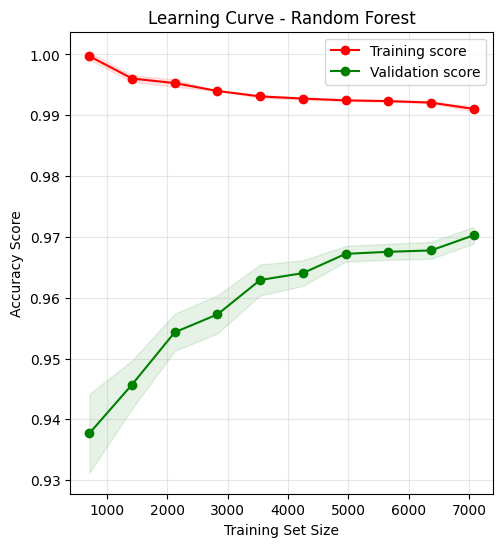

In [17]:
# The learning_curve computation part remains the same
train_sizes, train_scores, val_scores = learning_curve(
    rfmodel, X_train, Y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Use 10%, 20%, ..., 100% of data
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# The final score is the last element in the mean arrays
final_train_score = train_mean[-1]
final_val_score = val_mean[-1]

print("--- Final Model Performance (Trained on 100% Data) ---")
print(f"Final Training Score: {final_train_score * 100:.2f}%")
print(f"Final Validation Score: {final_val_score * 100:.2f}%")
print("------------------------------------------------------\n")

# Plot (This section remains correct for generating the learning curve plot)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve - Random Forest')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# **ROC curve**

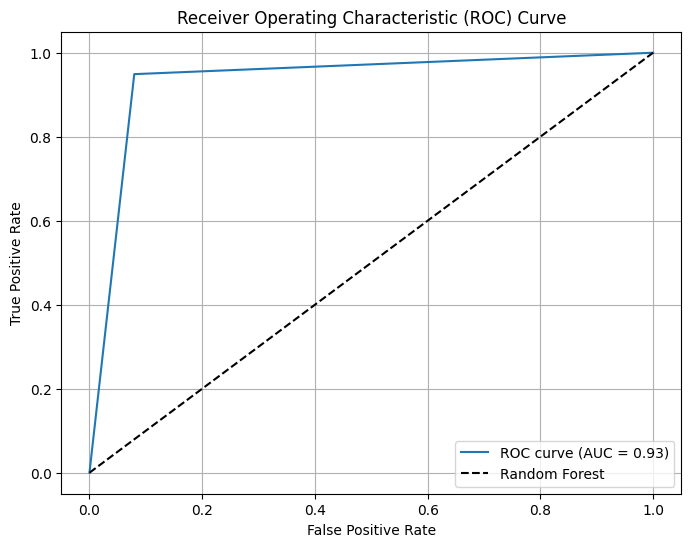

In [20]:
fpr,tpr,treshold = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# **Saving a trained model**

In [ ]:
joblib.dump(rfmodel,'randomforestmodel.joblib')

['randomforestmodel.joblib']